# Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',250)
pd.set_option('display.float.format',lambda x:'%.5f'%x)

C:\Users\mybes\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Understanding:

In [2]:
df=pd.read_csv('dataset9000.csv')

In [3]:
df.head()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
0,Professional,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
1,Professional,Poor,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
2,Professional,Beginner,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
3,Professional,Average,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
4,Professional,Intermediate,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator


In [4]:
df.shape

(9179, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Database Fundamentals            9179 non-null   object
 1   Computer Architecture            9179 non-null   object
 2   Distributed Computing Systems    9179 non-null   object
 3   Cyber Security                   9179 non-null   object
 4   Networking                       9179 non-null   object
 5   Software Development             9179 non-null   object
 6   Programming Skills               9179 non-null   object
 7   Project Management               9179 non-null   object
 8   Computer Forensics Fundamentals  9179 non-null   object
 9   Technical Communication          9179 non-null   object
 10  AI ML                            9179 non-null   object
 11  Software Engineering             9179 non-null   object
 12  Business Analysis                9

In [6]:
df.describe()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
count,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9178,9179
unique,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,17
top,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
freq,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,540


# Data Cleaning:

In [7]:
df.head()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
0,Professional,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
1,Professional,Poor,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
2,Professional,Beginner,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
3,Professional,Average,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
4,Professional,Intermediate,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator


## checking for null values:

In [8]:
df.isnull().sum()

Database Fundamentals              0
Computer Architecture              0
Distributed Computing Systems      0
Cyber Security                     0
Networking                         0
Software Development               0
Programming Skills                 0
Project Management                 0
Computer Forensics Fundamentals    0
Technical Communication            0
AI ML                              0
Software Engineering               0
Business Analysis                  0
Communication skills               0
Data Science                       0
Troubleshooting skills             0
Graphics Designing                 1
Role                               0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Database Fundamentals              0
Computer Architecture              0
Distributed Computing Systems      0
Cyber Security                     0
Networking                         0
Software Development               0
Programming Skills                 0
Project Management                 0
Computer Forensics Fundamentals    0
Technical Communication            0
AI ML                              0
Software Engineering               0
Business Analysis                  0
Communication skills               0
Data Science                       0
Troubleshooting skills             0
Graphics Designing                 0
Role                               0
dtype: int64

## Checking for Duplicates:

In [11]:
df.duplicated().value_counts()

False    7752
True     1426
dtype: int64

In [12]:
# total 1426 duplicates, so we will be dropping them.

df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().value_counts()

False    7752
dtype: int64

# Data Visualization:

In [14]:
df.head(2)

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
0,Professional,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
1,Professional,Poor,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator


## Target Variable:

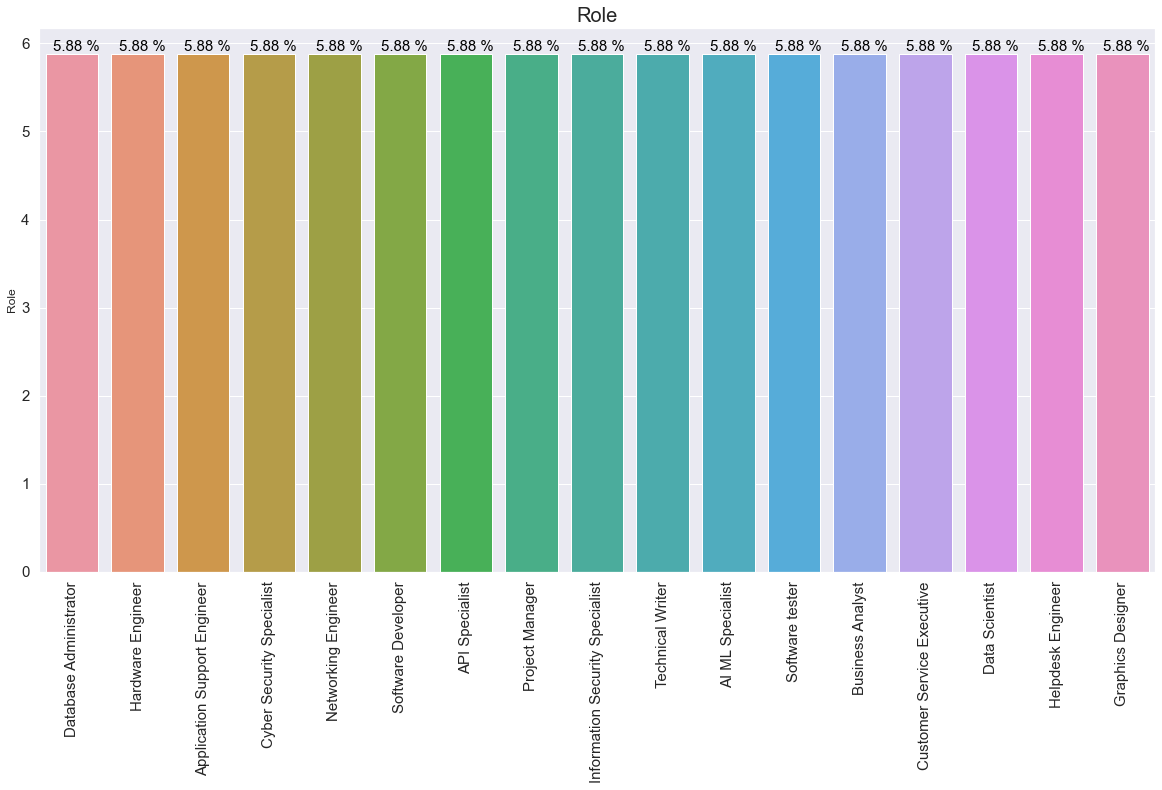

In [15]:
plt.figure(figsize= (20,10))
sns.set_theme(style="darkgrid")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Role',size=20)

data=(df['Role'].value_counts(normalize=True)*100).sort_values(ascending=False)

a=sns.barplot(x=data.index,y=data,order=data.index)
a.set_xticklabels(a.get_xticklabels(),rotation=90)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.5,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.show()

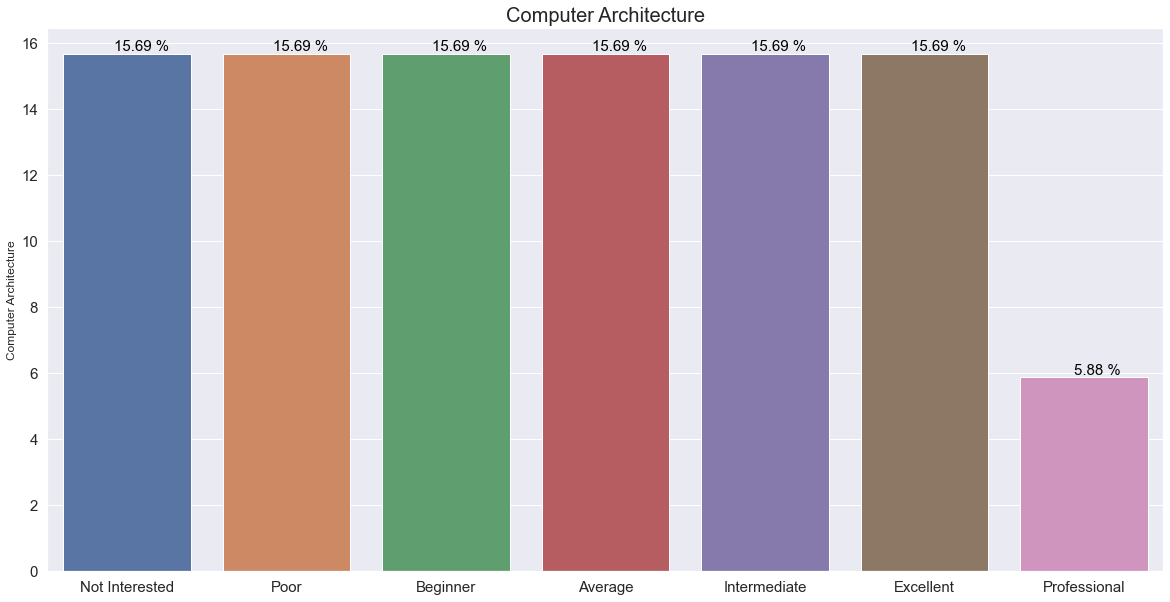

In [16]:
plt.figure(figsize= (20,10))
sns.set_theme(style="darkgrid")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Computer Architecture',size=20)

data=(df['Computer Architecture'].value_counts(normalize=True)*100).sort_values(ascending=False)

a=sns.barplot(x=data.index,y=data,order=data.index)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.5,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.show()

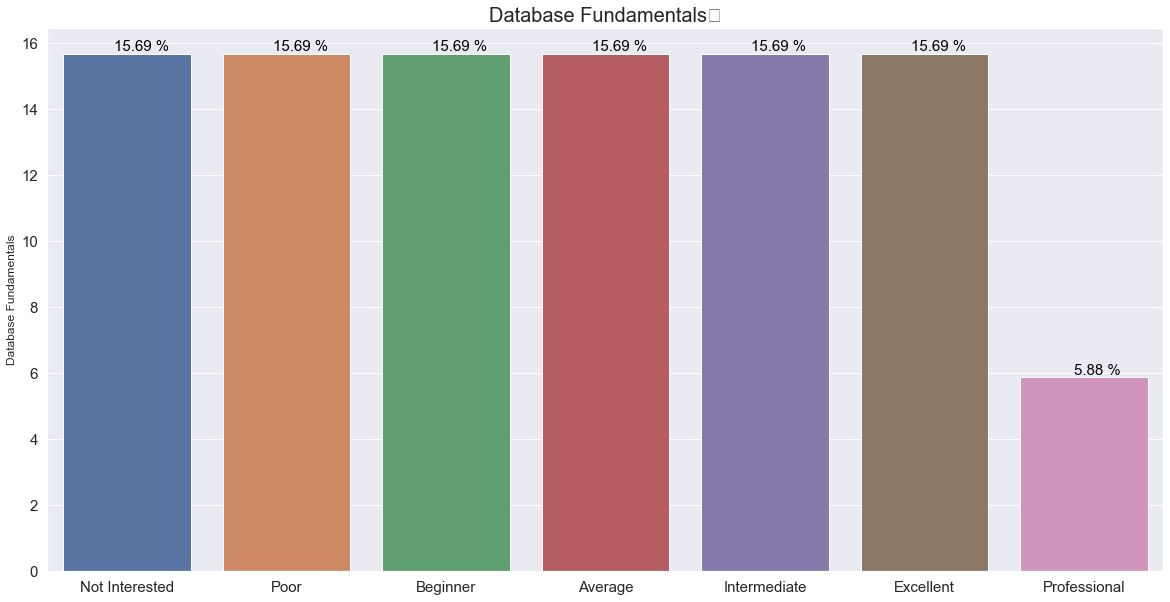

In [17]:
plt.figure(figsize= (20,10))
sns.set_theme(style="darkgrid")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Database Fundamentals	',size=20)

data=(df['Database Fundamentals'].value_counts(normalize=True)*100).sort_values(ascending=False)

a=sns.barplot(x=data.index,y=data,order=data.index)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.5,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.show()

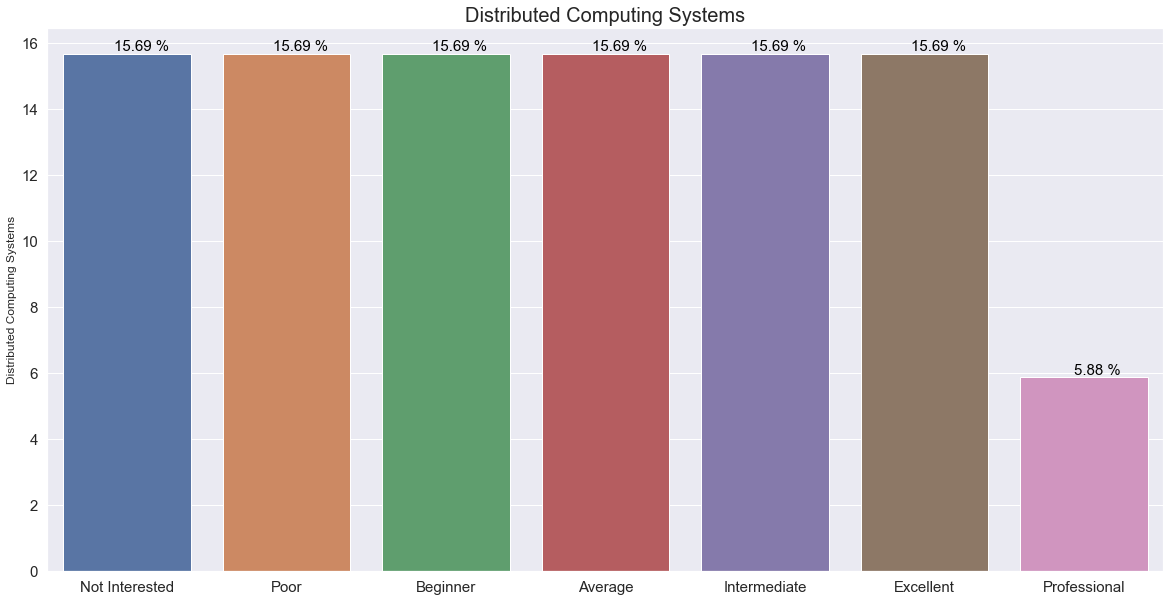

In [18]:
plt.figure(figsize= (20,10))
sns.set_theme(style="darkgrid")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Distributed Computing Systems',size=20)

data=(df['Distributed Computing Systems'].value_counts(normalize=True)*100).sort_values(ascending=False)

a=sns.barplot(x=data.index,y=data,order=data.index)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.5,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.show()

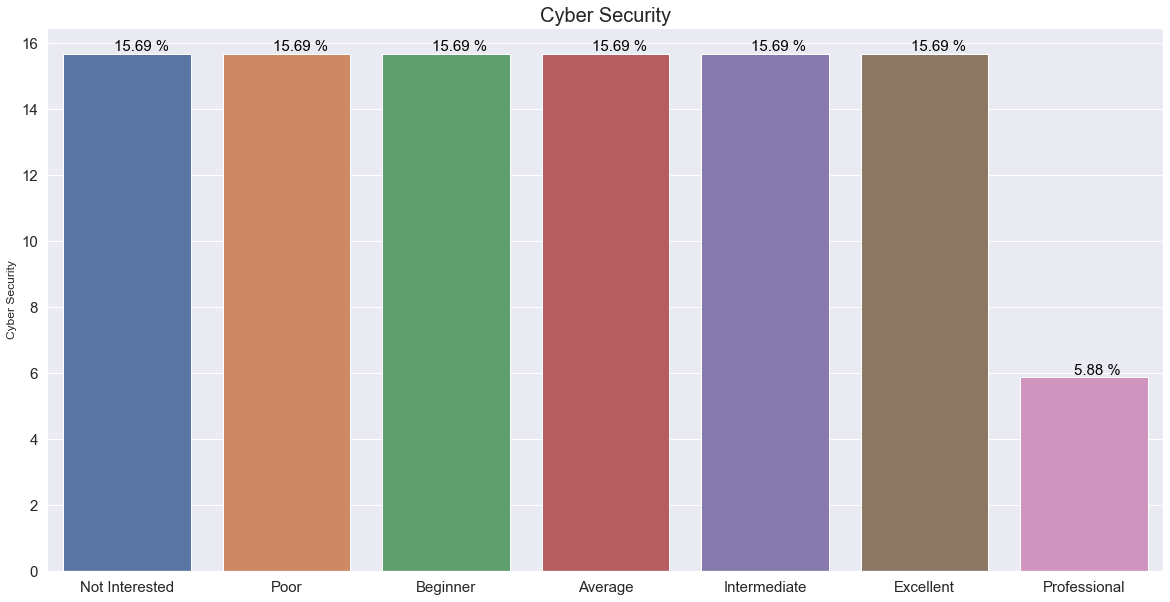

In [19]:
plt.figure(figsize= (20,10))
sns.set_theme(style="darkgrid")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Cyber Security',size=20)

data=(df['Cyber Security'].value_counts(normalize=True)*100).sort_values(ascending=False)

a=sns.barplot(x=data.index,y=data,order=data.index)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.5,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.show()

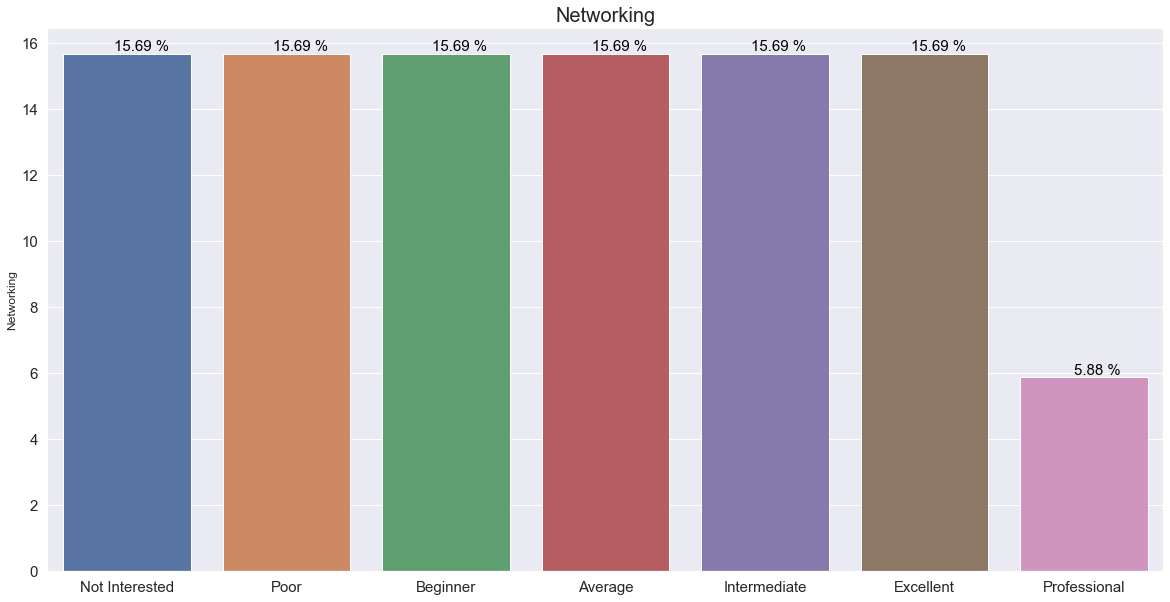

In [20]:
plt.figure(figsize= (20,10))
sns.set_theme(style="darkgrid")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Networking',size=20)

data=(df['Networking'].value_counts(normalize=True)*100).sort_values(ascending=False)

a=sns.barplot(x=data.index,y=data,order=data.index)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.5,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.show()

# Getting Data Ready for Modeling:

##  Encoding:

In [21]:
df.head()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
0,Professional,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
1,Professional,Poor,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
2,Professional,Beginner,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
3,Professional,Average,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
4,Professional,Intermediate,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator


In [22]:
d={'Not Interested':0,'Poor':1,'Beginner':2,'Intermediate':3,'Average':4,'Excellent':5,'Professional':6}

In [23]:
for i in df.columns:
    df[i]=df[i].apply(lambda x:d[x] if x in d.keys() else x)

In [24]:
df.head()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator
1,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator
2,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator
3,6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator
4,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator


In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Target_encoded'] = label_encoder.fit_transform(df['Role'])

df.head(5)

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role,Target_encoded
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator,7
1,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator,7
2,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator,7
3,6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator,7
4,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator,7


In [26]:
role_encoded=df.groupby('Role')['Target_encoded'].min().reset_index()
role_encoded

,Role,Target_encoded
0,AI ML Specialist,0
1,API Specialist,1
2,Application Support Engineer,2
3,Business Analyst,3
4,Customer Service Executive,4
5,Cyber Security Specialist,5
6,Data Scientist,6
7,Database Administrator,7
8,Graphics Designer,8
9,Hardware Engineer,9


In [27]:
df.drop('Role',axis=1,inplace=True)

In [28]:
df.head()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Target_encoded
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
1,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
2,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
3,6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
4,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7


# Train-Test Split:

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X=df.drop(['Target_encoded'],axis=1)

y=df.Target_encoded
  
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=100)

In [31]:
print(X_train.shape)
print(y_train.shape)             # checking if the shapes of train and test sets are compatible.
print(X_test.shape)
print(y_test.shape)

(5426, 17)
(5426,)
(2326, 17)
(2326,)


In [32]:
X_train.head()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing
697,2,6,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2
7512,3,3,3,3,3,3,3,3,3,3,3,0,3,6,3,3,3
671,4,6,4,4,4,5,4,4,4,4,4,4,4,4,4,4,4
4721,0,0,0,0,5,0,0,0,6,0,0,0,0,0,0,0,0
3188,4,4,4,2,4,6,4,4,4,4,4,4,4,4,4,4,4


# Model Building:

In [33]:
metrics_df=pd.DataFrame(columns=['Accuracy','Precision','Sensitivity','Specificity',
                                'Balanced Accuracy','F1 - score','False Positive Rate','False Negative Rate'])
from sklearn.metrics import accuracy_score ,roc_curve,roc_auc_score,precision_recall_curve

def custom_metrics(a,p,method):
    from sklearn import metrics
    confusion = metrics.confusion_matrix(a,p)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    met=[]
    acc=round((TP+TN)/(TP+TN+FP+FN),5)
    prec=round(TP /(TP+FP),5)
    sens=round(TP /(TP+FN),5)
    spec=round(TN / (TN+FP),5)
    bal=round((sens+spec)/2,5)
    f1=round((2*prec*sens)/(sens+prec),5)
    fpr=round(FN/(TP+FN),5)
    fnr=round(FP/(TN+FP),5)
    met.append([acc,prec,sens,spec,bal,f1,fpr,fnr])
    metrics_df.loc[method]=met[0]
    return metrics_df.tail(2)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [35]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [36]:
y_train_predictions=model.predict(X_train)

In [37]:
custom_metrics(y_train_predictions,y_train,'Logistic_Regression_Train')

,Accuracy,Precision,Sensitivity,Specificity,Balanced Accuracy,F1 - score,False Positive Rate,False Negative Rate
Logistic_Regression_Train,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000


## Test Set predictions:

In [38]:
y_test_predictions=model.predict(X_test)

custom_metrics(y_test,y_test_predictions,'Logistic_Regression_Test')

,Accuracy,Precision,Sensitivity,Specificity,Balanced Accuracy,F1 - score,False Positive Rate,False Negative Rate
Logistic_Regression_Train,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000
Logistic_Regression_Test,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000


# Model Input:

In [39]:
col=list(df.columns)
col=col[0:-1]
input=pd.DataFrame(columns=col)
input

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing


In [40]:
# Enter Input here... based on the above dataframe, if you don't have a input leave it as 0..
#d={'Not Interested':0,'Poor':1,'Beginner':2,'Intermediate':3,'Average':4,'Excellent':5,'Professional':6}
input_list=[1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5]

In [41]:
input.loc[len(input)] = input_list
input

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing
0,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5


In [42]:
output=model.predict(input)
prob=list(model.predict_proba(input))
input.drop(len(input)-1, inplace=True)

In [43]:
role_encoded['Probability']=prob[0]
top_roles=role_encoded.sort_values(by='Probability',ascending=False)['Role'].head(5)
role_encoded.drop('Probability',axis=1,inplace=True)
top_roles

15        Software tester
14     Software Developer
12    Networking Engineer
0        AI ML Specialist
8       Graphics Designer
Name: Role, dtype: object

In [44]:
#role_encoded